In [1]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ~/tmp/sarcasm.json




--2020-02-05 18:30:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/home/lee/tmp/sarcasm.json’

/home/lee/tmp/sarca 100%[===================>]   5.38M  4.80MB/s    in 1.1s    

2020-02-05 18:30:03 (4.80 MB/s) - ‘/home/lee/tmp/sarcasm.json’ saved [5643545/5643545]



In [16]:
import json
import os
import tensorflow.compat.v1 as tf
import os

tf.disable_v2_behavior()
# import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 50


with open(os.path.expanduser("~/tmp/sarcasm.json"), 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(testing_sentences[:5])

['pediatricians announce 2011 newborns are ugliest babies in 30 years', "don't rely on your fitness tracker to lose weight", 'you might want to cut back on the soap', 'bausch & lomb introduces line of aviator contacts', '7 everyday habits for glowing, younger-looking skin']


In [20]:

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.GlobalMaxPooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable

In [21]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)



Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 139s 7ms/sample - loss: 0.4570 - acc: 0.7674 - val_loss: 0.3941 - val_acc: 0.8155
Epoch 2/50
20000/20000 [==============================] - 141s 7ms/sample - loss: 0.3608 - acc: 0.8342 - val_loss: 0.3854 - val_acc: 0.8198
Epoch 3/50
20000/20000 [==============================] - 143s 7ms/sample - loss: 0.3441 - acc: 0.8448 - val_loss: 0.3756 - val_acc: 0.8296
Epoch 4/50
20000/20000 [==============================] - 143s 7ms/sample - loss: 0.3380 - acc: 0.8492 - val_loss: 0.3713 - val_acc: 0.8301
Epoch 5/50
20000/20000 [==============================] - 145s 7ms/sample - loss: 0.3145 - acc: 0.8583 - val_loss: 0.3728 - val_acc: 0.8317
Epoch 6/50
20000/20000 [==============================] - 146s 7ms/sample - loss: 0.3049 - acc: 0.8627 - val_loss: 0.3820 - val_acc: 0.8286
Epoch 7/50
20000/20000 [==============================] - 144s 7ms/sample - loss: 0.2985 - acc: 0.8679 - val_lo

KeyboardInterrupt: 

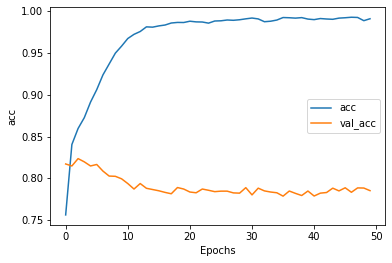

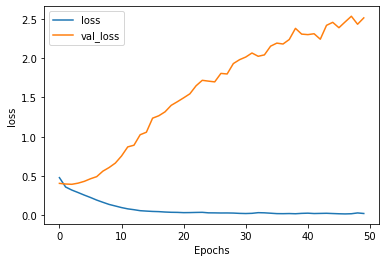

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [0]:
model.save("test.h5")